In [1]:
import pandas as pd
import numpy as np 
import plotly.express as px
import seaborn as sns
from scipy import stats 

In [2]:
dataset = pd.read_csv('acoes.csv')
dataset

,Date,GOL,CVC,WEGE,TOTS,BOVA
0,2018-01-02,15.19,41.110577,9.623076,10.006355,75.099998
1,2018-01-03,15.01,40.871563,9.476923,10.218762,75.300003
2,2018-01-04,15.58,41.201237,9.384615,10.155704,76.000000
3,2018-01-05,15.66,40.995190,9.423076,10.374748,76.440002
4,2018-01-08,15.70,40.822109,9.500000,10.368111,76.760002
...,...,...,...,...,...,...
1445,2023-11-24,9.10,3.330000,33.720001,32.330002,121.660004
1446,2023-11-27,9.45,3.250000,34.139999,33.090000,121.940002
1447,2023-11-28,9.50,3.320000,34.369999,33.560001,122.720001
1448,2023-11-29,9.01,3.300000,34.130001,33.480000,122.269997


In [3]:
figura = px.line(title = 'Histórico dos preços das ações')
for i in dataset.columns[1:]:
    figura.add_scatter(x = dataset['Date'], y = dataset[i], name = i)
figura.show()

In [4]:
#criando outro dataset apenas para BOVA

dataset = pd.DataFrame(dataset['BOVA'])
dataset 

,BOVA
0,75.099998
1,75.300003
2,76.000000
3,76.440002
4,76.760002
...,...
1445,121.660004
1446,121.940002
1447,122.720001
1448,122.269997


In [5]:
dataset_normalizado = dataset.copy()
for i in dataset:
    dataset_normalizado[i] =  dataset[i] /dataset[i][0]
dataset_normalizado

,BOVA
0,1.000000
1,1.002663
2,1.011984
3,1.017843
4,1.022104
...,...
1445,1.619973
1446,1.623702
1447,1.634088
1448,1.628096


In [6]:
#taxa de retorno logaritimica 

dataset_taxa_retorno = np.log(1 + dataset_normalizado.pct_change())
dataset_taxa_retorno

,BOVA
0,NaN
1,0.002660
2,0.009253
3,0.005773
4,0.004178
...,...
1445,-0.009978
1446,0.002299
1447,0.006376
1448,-0.003674


In [7]:
#preenchimento de 0 em lugaruas NaN

dataset_taxa_retorno.fillna(0, inplace=True)
dataset_taxa_retorno

,BOVA
0,0.000000
1,0.002660
2,0.009253
3,0.005773
4,0.004178
...,...
1445,-0.009978
1446,0.002299
1447,0.006376
1448,-0.003674


In [8]:
#Média de variação de preço 

media = dataset_taxa_retorno.mean()
media 

BOVA    0.000343
dtype: float64

In [9]:
#criando a variancia (Quão afastado está o valor da media)

variancia = dataset_taxa_retorno.var()
variancia

BOVA    0.000277
dtype: float64

In [10]:
drift = media - (0.5 * variancia)
drift 

BOVA    0.000205
dtype: float64

## Cálculos dos retornos diários

In [11]:
dias_frente = 50
simulacoes = 10

In [12]:
desvio_padrao = dataset_taxa_retorno.std()
desvio_padrao

BOVA    0.016649
dtype: float64

In [13]:
Z = stats.norm.ppf(np.random.rand(dias_frente, simulacoes))

In [14]:
Z.shape

(50, 10)

In [15]:
Z

array([[-6.80143979e-01, -1.03101181e-01,  1.09050435e+00,
         3.11737773e-01, -2.15957289e-01,  9.68893381e-02,
         1.33702391e+00,  2.14932703e-01,  1.58514950e+00,
        -7.53984036e-01],
       [-5.25376240e-01, -4.77826123e-01,  1.63011200e+00,
         1.56192434e+00,  1.41239103e+00, -2.00546164e-01,
         7.41069416e-01, -1.28734917e+00, -2.27774652e-02,
        -8.18266619e-03],
       [-7.31226152e-01, -7.38450239e-01, -6.89823219e-01,
         1.79336687e+00,  4.58280300e-01,  5.80903413e-01,
        -1.80301917e+00, -2.44184547e-02, -1.13623599e-01,
         4.41724802e-01],
       [-1.94686198e-01, -2.04459312e+00,  7.77464895e-01,
        -1.72039685e+00, -6.23090687e-01,  4.95304177e-01,
         6.73476309e-02, -1.32409118e+00, -8.29027021e-01,
        -9.11417742e-02],
       [ 1.49294360e+00, -1.65959470e+00,  2.61878266e-02,
        -5.49150543e-01,  7.73555072e-01,  1.14797625e+00,
         7.25390563e-01, -1.81748872e+00,  5.56793604e-01,
        -1.

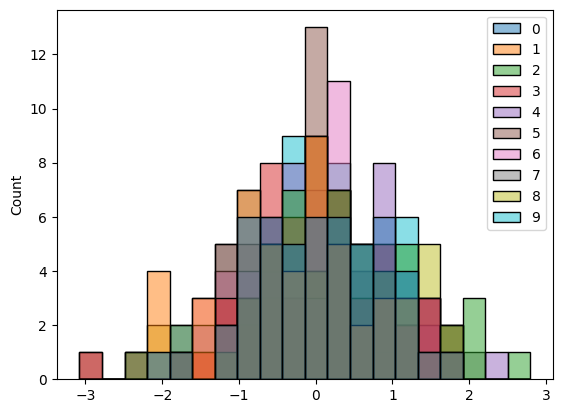

In [16]:
sns.histplot(Z);

In [17]:
retornos_diarios = np.exp(drift.values + desvio_padrao.values * Z)

## Previsão de preços futuros

In [18]:
previsoes = np.zeros_like(retornos_diarios)

In [19]:
#Pegar o ultimo valor de dias disponiveis e colcoar no dataFrame
dataset.tail(1)

,BOVA
1449,123.57


In [20]:
#Usando o iloc para comprovar o valor real do index buscado

dataset.iloc[1445]

BOVA    121.660004
Name: 1445, dtype: float64

In [21]:
previsoes[0] = dataset.iloc[-1]
previsoes

array([[123.56999969, 123.56999969, 123.56999969, 123.56999969,
        123.56999969, 123.56999969, 123.56999969, 123.56999969,
        123.56999969, 123.56999969],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  

In [22]:
for dia in range(1, dias_frente):
    previsoes[dia] = previsoes[dia-1] * retornos_diarios[dia]

In [23]:
previsoes

array([[123.56999969, 123.56999969, 123.56999969, 123.56999969,
        123.56999969, 123.56999969, 123.56999969, 123.56999969,
        123.56999969, 123.56999969],
       [122.51896915, 122.61599881, 126.99550932, 126.85142215,
        126.53601576, 123.18334234, 125.12965169, 120.97453718,
        123.54845575, 123.57847956],
       [121.06127584, 121.14258026, 125.57108192, 130.7227141 ,
        127.53126541, 124.40593807, 121.45423471, 120.95014132,
        123.34022715, 124.51614257],
       [120.6942428 , 117.11231635, 127.23306223, 127.05766634,
        126.24100504, 125.46174417, 121.61540143, 118.33729685,
        121.67448522, 124.35281845],
       [123.75709071, 113.94414465, 127.31462468, 125.92711835,
        127.90352613, 127.90885396, 123.11824139, 114.83372433,
        122.83279122, 120.64880654],
       [125.15694538, 114.38424655, 128.5507654 , 127.25615659,
        130.60570191, 126.98426395, 123.56327016, 113.84397456,
        125.21410142, 123.70225832],
       [12

## Gráfico de previsões

In [24]:
previsoes.T

array([[123.56999969, 122.51896915, 121.06127584, 120.6942428 ,
        123.75709071, 125.15694538, 125.81640904, 124.49780468,
        123.65230242, 123.58316815, 121.67362309, 120.00172816,
        120.92925407, 119.15175129, 120.78676608, 120.93827071,
        122.56112831, 126.27335015, 125.14398727, 122.88803471,
        122.89226818, 122.79926804, 123.25478747, 123.27084169,
        121.79365534, 124.41466299, 125.53784903, 127.048707  ,
        126.42571212, 127.52766504, 125.87440642, 128.36962348,
        129.14398103, 130.92314703, 129.57773765, 128.86434613,
        126.65766265, 127.59450299, 129.72685957, 132.28992837,
        127.88333903, 126.67391471, 127.56510341, 128.24727574,
        130.43331678, 132.74518608, 134.89695194, 134.56523976,
        134.40284728, 130.64193317],
       [123.56999969, 122.61599881, 121.14258026, 117.11231635,
        113.94414465, 114.38424655, 113.53161883, 112.33805546,
        113.40983087, 111.72001253, 112.48073335, 110.51305073,
   

In [25]:
figura = px.line(title = 'Previsões do preço das ações - simulações')
for i in range(len(previsoes.T)):
    figura.add_scatter(y=previsoes.T[i], name= i)
figura.show()

## COMPARAÇÃO DAS PREVISÕES COM OS PREÇOS REAIS

In [26]:
import yfinance as yf

dataset_bova = yf.download('BOVA11.SA', start='2023-12-01')['Close']
print(dataset_bova)


[*********************100%%**********************]  1 of 1 completed
Date
2023-12-01    124.239998
2023-12-04    122.959999
2023-12-05    123.010002
2023-12-06    121.720001
2023-12-07    122.290001
                 ...    
2024-08-29    132.169998
2024-08-30    132.600006
2024-09-02    131.100006
2024-09-03    130.630005
2024-09-04    132.380005
Name: Close, Length: 191, dtype: float64


In [27]:
dataset_bova.to_csv('bova_teste.csv')

In [28]:
dataset_bova = pd.read_csv('bova_teste.csv')
dataset_bova

,Date,Close
0,2023-12-01,124.239998
1,2023-12-04,122.959999
2,2023-12-05,123.010002
3,2023-12-06,121.720001
4,2023-12-07,122.290001
...,...,...
186,2024-08-29,132.169998
187,2024-08-30,132.600006
188,2024-09-02,131.100006
189,2024-09-03,130.630005


In [34]:
dataset_bova_50 = dataset_bova.head(50)

In [35]:
simulacao1 = previsoes.T[0]
simulacao1

array([123.56999969, 122.51896915, 121.06127584, 120.6942428 ,
       123.75709071, 125.15694538, 125.81640904, 124.49780468,
       123.65230242, 123.58316815, 121.67362309, 120.00172816,
       120.92925407, 119.15175129, 120.78676608, 120.93827071,
       122.56112831, 126.27335015, 125.14398727, 122.88803471,
       122.89226818, 122.79926804, 123.25478747, 123.27084169,
       121.79365534, 124.41466299, 125.53784903, 127.048707  ,
       126.42571212, 127.52766504, 125.87440642, 128.36962348,
       129.14398103, 130.92314703, 129.57773765, 128.86434613,
       126.65766265, 127.59450299, 129.72685957, 132.28992837,
       127.88333903, 126.67391471, 127.56510341, 128.24727574,
       130.43331678, 132.74518608, 134.89695194, 134.56523976,
       134.40284728, 130.64193317])

In [37]:
dataset_bova_50['Close'] - simulacao1

0      0.669998
1      0.441030
2      1.948726
3      1.025758
4     -1.467090
5     -1.846948
6     -2.706408
7     -1.897806
8      2.057697
9      3.296829
10     4.606376
11     7.268268
12     7.120749
13     7.668248
14     7.563240
15     8.001732
16     7.088866
17     3.956646
18     5.246012
19     5.871960
20     6.097737
21     4.550730
22     4.995213
23     5.299166
24     5.796341
25     2.525339
26     1.272149
27     0.181296
28     1.394288
29    -2.037667
30    -1.344408
31    -4.809626
32    -5.303985
33    -8.223150
34    -5.027735
35    -4.894345
36    -2.197664
37    -2.514501
38    -4.976860
39    -8.719929
40    -3.933342
41    -2.113917
42    -3.985102
43    -4.387275
44    -3.553320
45    -6.575188
46   -10.386950
47   -10.435243
48   -11.172844
49    -6.581936
Name: Close, dtype: float64

In [38]:
simulacao1 - dataset_bova_50['Close']

0     -0.669998
1     -0.441030
2     -1.948726
3     -1.025758
4      1.467090
5      1.846948
6      2.706408
7      1.897806
8     -2.057697
9     -3.296829
10    -4.606376
11    -7.268268
12    -7.120749
13    -7.668248
14    -7.563240
15    -8.001732
16    -7.088866
17    -3.956646
18    -5.246012
19    -5.871960
20    -6.097737
21    -4.550730
22    -4.995213
23    -5.299166
24    -5.796341
25    -2.525339
26    -1.272149
27    -0.181296
28    -1.394288
29     2.037667
30     1.344408
31     4.809626
32     5.303985
33     8.223150
34     5.027735
35     4.894345
36     2.197664
37     2.514501
38     4.976860
39     8.719929
40     3.933342
41     2.113917
42     3.985102
43     4.387275
44     3.553320
45     6.575188
46    10.386950
47    10.435243
48    11.172844
49     6.581936
Name: Close, dtype: float64

In [39]:
#Precisamos apenas dos número absolutos

abs(simulacao1 - dataset_bova_50['Close'])

0      0.669998
1      0.441030
2      1.948726
3      1.025758
4      1.467090
5      1.846948
6      2.706408
7      1.897806
8      2.057697
9      3.296829
10     4.606376
11     7.268268
12     7.120749
13     7.668248
14     7.563240
15     8.001732
16     7.088866
17     3.956646
18     5.246012
19     5.871960
20     6.097737
21     4.550730
22     4.995213
23     5.299166
24     5.796341
25     2.525339
26     1.272149
27     0.181296
28     1.394288
29     2.037667
30     1.344408
31     4.809626
32     5.303985
33     8.223150
34     5.027735
35     4.894345
36     2.197664
37     2.514501
38     4.976860
39     8.719929
40     3.933342
41     2.113917
42     3.985102
43     4.387275
44     3.553320
45     6.575188
46    10.386950
47    10.435243
48    11.172844
49     6.581936
Name: Close, dtype: float64

In [40]:
#Soma de todos os valores de projeção do dataset

np.sum(abs(simulacao1 - dataset_bova_50['Close']))

#Resultado = valor de diferença entre os valores reais e a primeira simulação 

227.03762927555215

In [41]:
#Exxtraindo o valor da média 

np.sum(abs(simulacao1 - dataset_bova_50['Close'])) / len(simulacao1)

#Resultado = erro médio em comparações com os valores 

4.540752585511043

In [42]:
#Podemos fazer o mesmo cálculo importando a biblioteca de sklearn

from sklearn.metrics import mean_absolute_error
mean_absolute_error(dataset_bova_50['Close'], simulacao1)

4.540752585511043

In [43]:
erros = []
for i in range(len(previsoes.T)):
    simulacao = previsoes.T[i][0:len(dataset_bova_50)]
    erros.append(mean_absolute_error(dataset_bova_50['Close'], simulacao))

In [44]:
erros

[4.540752585511043,
 18.939685035628052,
 9.063419068695145,
 5.344487365981969,
 7.059062819200184,
 3.1811298070446266,
 8.072460501060288,
 8.923075141213774,
 7.199591725427439,
 3.6077633530354856]

In [45]:
#plot dos valores reais da base de dados

figura = px.line(title= 'Previsões do preço das ações - simulação')
figura.add_scatter(y= dataset_bova_50['Close'], name = 'Valor real')

In [46]:
#Comparando desempenho entre as previsões

figura = px.line(title= 'Previsões do preço das ações - simulação')
figura.add_scatter(y= dataset_bova_50['Close'], name = 'Valor real')
figura.add_scatter(y = previsoes.T[1], name = 'Pior simulação')

In [47]:
#Comparando a melhor e a pior simulação com os valores reais 

figura = px.line(title= 'Previsões do preço das ações - simulação')
figura.add_scatter(y= dataset_bova_50['Close'], name = 'Valor real')
figura.add_scatter(y = previsoes.T[1], name = 'Pior simulação')
figura.add_scatter(y= previsoes.T[4], name = 'Melhor simulação')